In [158]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 

In [159]:
bikes = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/CBS_2021-2023_Full.csv", low_memory=False)
# bikes3 = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/bikes_clean.csv", low_memory=False)

KeyboardInterrupt: 

# Data Wrangling

In [ ]:
bikes.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,38.956738,-77.027940,casual
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.900000,-77.020000,casual
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,38.876893,-77.006072,casual
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member


In [ ]:
bikes.shape

(10693997, 13)

In [ ]:
bikes.info()
sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


<module 'seaborn' from '/opt/anaconda3/envs/codeacademy/lib/python3.12/site-packages/seaborn/__init__.py'>

In [ ]:
# Convert categorical columns to category type for memory efficiency
bikes2= bikes.copy()
bikes2["rideable_type"] = bikes2["rideable_type"].astype("category")
bikes2["start_station_name"] = bikes2["start_station_name"].astype("category")
bikes2["end_station_name"] = bikes2["end_station_name"].astype("category")
bikes2["member_casual"] = bikes2["member_casual"].astype("category")

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
bikes2['ride_id'] = pd.Series(range(1, len(bikes2) + 1), dtype='uint32')

In [ ]:
bikes2["started_at"]=pd.to_datetime(bikes["started_at"])
bikes2["ended_at"]=pd.to_datetime(bikes["ended_at"])
bikes2.info()
bikes2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


## handling missing / incomplete data

In [ ]:
# # missing values
# bikes2.isna().any()
# bikes2.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

determine the latitude/long coordinates for each station
do a for loop creating a range of max and min, latitude and longitud, for each station. 
Use this range to input missing values.

In [ ]:
# bikes[bikes["end_station_id"]==31015.0]
# # transform coordinates into float
# bikes2= bikes.copy()

# # bikes2.astype({"start_lat": float})
# bikes2.astype({"start_lat": float, "start_lng": float, "end_lat":float, "end_lng":float})

## formatting

In [ ]:
bikes2["start_station_id"]=bikes2["start_station_id"].str.replace(".0","")
bikes2["end_station_id"]=bikes2["end_station_id"].str.replace(".0","")

## unique values

In [ ]:
# # unique values before formatting
# # Filter the DataFrame for object columns
# non_numeric = bikes.select_dtypes("object")

# # Loop through columns
# for x in non_numeric.columns:
  
#   # Print the number of unique values
#   print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

# # Filter the DataFrame for object columns
# non_numeric = bikes2.select_dtypes("object")

# # Loop through columns
# for x in non_numeric.columns:
  
#   # Print the number of unique values
#   print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

  ##NOTE - removing the '.0" at the end of station id reduced the amount of unique values by 600


Number of unique values in ride_id column:  10693997
Number of unique values in rideable_type column:  3
Number of unique values in started_at column:  9649173
Number of unique values in ended_at column:  9638365
Number of unique values in start_station_name column:  860
Number of unique values in start_station_id column:  1321
Number of unique values in end_station_name column:  865
Number of unique values in end_station_id column:  1338
Number of unique values in member_casual column:  2
Number of unique values in start_station_id column:  774
Number of unique values in end_station_id column:  778


In [ ]:
# bikes2.isna().any()
# bikes2.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

## Dealing with missing values

In [ ]:
# # Determine a range of latitude and longitud (max and min) for each station
# coordinate_columns = bikes2[["start_lat","start_lng","end_lat","end_lng"]]

# # bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1, "start_lat")
# print("max_latitude: ", bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1,"start_lat")["start_lat"])
# print("min_latitude: ",bikes2[bikes2["start_station_name"]=="10th & U St NW"].nsmallest(1,"start_lat")["start_lat"])

# # filter = bikes2["start_station_name"]=="10th & U St NW"
# # filter

## Step 1: Create a Station Boundary Lookup
Create a DataFrame containing the station IDs along with their latitude and longitude ranges.





In [ ]:
# station_bounds = bikes2.groupby("start_station_id").agg({
#     "start_lat": ["min", "max"],
#     "start_lng": ["min", "max"]
# }).reset_index()

# # Flatten multi-level column names
# station_bounds.columns = ["start_station_id", "min_lat", "max_lat", "min_lng", "max_lng"]

In [ ]:
# station_bounds["centroid_lat"] = (station_bounds["min_lat"] + station_bounds["max_lat"]) / 2
# station_bounds["centroid_lng"] = (station_bounds["min_lng"] + station_bounds["max_lng"]) / 2
# station_bounds

## Step 2: Define a Function to Match Coordinates
Create a function that takes the latitude and longitude of a row and finds the start_station_id that falls within the corresponding range.

how is it possible that there are more unique values in the id columns than in the name columns? they should be the same. one possible explanation is that one station_name has multiple station_id's

In [ ]:
# def find_station_id(lat, lng, station_bounds):
#     # Filter the station bounds for matches
#     matches = station_bounds[
#         (station_bounds["min_lat"] <= lat) & 
#         (station_bounds["max_lat"] >= lat) & 
#         (station_bounds["min_lng"] <= lng) & 
#         (station_bounds["max_lng"] >= lng)]
#     print(f"Lat: {lat}, Lng: {lng}, Matches:\n{matches}")
    
#     # If exactly one match, return the station ID
#     if len(matches) == 1:
#         return matches["start_station_id"].iloc[0]
#     elif len(matches) > 1:
#         # Calculate distances to the centroid of each matching station
#         matches["distance"] = np.sqrt(
#             (matches["centroid_lat"] - lat) ** 2 + 
#             (matches["centroid_lng"] - lng) ** 2
#         )
#         # Return the station ID with the smallest distance
#         return matches.loc[matches["distance"].idxmin(), "start_station_id"]
#     return None

# test_row = bikes2.iloc[0]
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))


## Step 3: Apply the Function to Fill Missing Values
Use the .apply() method to fill the missing start_station_id values.

In [ ]:
# bikes2["start_station_id"] = bikes2.apply(
#     lambda row: find_station_id(row["start_lat"], row["start_lng"], station_bounds)
#     if pd.isnull(row["start_station_id"]) else row["start_station_id"],
#     axis=1
# )

In [ ]:
# test_row = bikes2.iloc[0]  # Replace with a specific row index
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))

In [ ]:
# missing_count = bikes2["start_station_id"].isnull().sum()
# print(f"Remaining missing start_station_id values: {missing_count}")

In [ ]:
# print(f"Latitudes: {bikes2['start_lat'].min()} - {bikes2['start_lat'].max()}")
# print(f"Longitudes: {bikes2['start_lng'].min()} - {bikes2['start_lng'].max()}")

# print(f"Station Bounds Latitude: {station_bounds['min_lat'].min()} - {station_bounds['max_lat'].max()}")
# print(f"Station Bounds Longitude: {station_bounds['min_lng'].min()} - {station_bounds['max_lng'].max()}")

# KNN

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# encoder = LabelEncoder()

# # Encode the non-null values of start_station_id
# bikes2["start_station_id_encoded"] = bikes2["start_station_id"]
# bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id_encoded"] = encoder.fit_transform(
#     bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id"])

In [ ]:
# from sklearn.impute import KNNImputer

#REVIEW - TAKES WAY TO LONG TO DO IT LIKE THIS, 4 HS AND STILL GOING
# # Prepare the data for imputation
# knn_data = bikes2[["start_lat", "start_lng", "start_station_id_encoded"]]

# # Initialize the KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=3, weights="distance")


# # Perform the imputation
# knn_imputed = knn_imputer.fit_transform(knn_data)

# # Update the imputed values in the DataFrame
# bikes2["start_station_id_encoded"] = knn_imputed[:, 2]

# Use grid cell to impute missing values

In [ ]:
bikes2["start_lat_filled"] = bikes2["start_lat"].fillna(0)
bikes2["start_lng_filled"] = bikes2["start_lng"].fillna(0)

# Create grid cells using the filled coordinates
grid_size = 0.0005  # Approx. ~100mts
bikes2["grid_cell"] = (
    (bikes2["start_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
    (bikes2["start_lng_filled"] // grid_size).astype(int).astype(str)
)

bikes2["grid_cell"].head()

0    77760_-154051
1    77834_-154052
2    77824_-154078
3    77758_-154230
4    77862_-154057
Name: grid_cell, dtype: object

In [ ]:
known = bikes2.dropna(subset=["start_station_id"])

# Map each grid cell to the most frequent station ID
grid_to_station = known.groupby("grid_cell")["start_station_id"].agg(lambda x: x.mode()[0]).to_dict()

grid_to_station

{'0_0': 'MTL-ECO5-03',
 '77565_-154032': '32406',
 '77565_-154033': '32406',
 '77571_-154034': '32423',
 '77571_-154035': '32423',
 '77572_-154034': '32423',
 '77585_-154099': '31929',
 '77585_-154100': '31929',
 '77586_-154098': '31929',
 '77586_-154099': '31929',
 '77586_-154100': '31929',
 '77593_-154006': '32415',
 '77593_-154155': '31533',
 '77595_-154097': '31907',
 '77595_-154108': '31914',
 '77596_-154098': '31907',
 '77597_-154002': '32407',
 '77597_-154003': '32407',
 '77598_-154089': '31903',
 '77598_-154090': '31903',
 '77600_-154138': '31082',
 '77600_-154260': '31932',
 '77600_-154261': '31932',
 '77601_-154096': '31958',
 '77601_-154097': '31958',
 '77601_-154137': '31082',
 '77601_-154138': '31082',
 '77601_-154139': '31082',
 '77602_-154138': '31082',
 '77602_-154139': '31082',
 '77603_-154080': '31933',
 '77603_-154081': '31933',
 '77603_-154240': '31930',
 '77604_-154081': '31933',
 '77604_-154127': '31084',
 '77604_-154128': '31084',
 '77605_-154081': '31041',
 '776

In [ ]:
bikes2.loc[bikes2["start_station_id"].isnull(), "start_station_id"] = bikes2["grid_cell"].map(grid_to_station)

In [ ]:
print(f"missing values before imputation: {bikes["start_station_id"].isna().sum()}")
print(f"missing values after imputation: {bikes2["start_station_id"].isna().sum()}")

missing values before imputation: 742776
missing values after imputation: 667982


with grid size 0.001
missing values before imputation: 742776
missing values after imputation: 603396
with grid size 0.0001
missing values before imputation: 742776
missing values after imputation: 742776
0.0005
missing values before imputation: 742776
missing values after imputation: 667982

In [ ]:
bikes2["end_station_id"].isna().sum()

np.int64(811282)

In [ ]:
## missing values for end station id

bikes2["end_lat_filled"] = bikes2["end_lat"].fillna(0)
bikes2["end_lng_filled"] = bikes2["end_lng"].fillna(0)

# Create grid cells using the filled coordinates
grid_size = 0.0005  # Approx. 100 meters
bikes2["grid_cell_end"] = (
    (bikes2["end_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
    (bikes2["end_lng_filled"] // grid_size).astype(int).astype(str)
)

bikes2["grid_cell_end"].head()
known = bikes2.dropna(subset=["end_station_id"])

# Map each grid cell to the most frequent station ID
grid_to_station = known.groupby("grid_cell_end")["end_station_id"].agg(lambda x: x.mode()[0]).to_dict()

grid_to_station
bikes2.loc[bikes2["end_station_id"].isnull(), "end_station_id"] = bikes2["grid_cell_end"].map(grid_to_station)

In [ ]:
print(f"missing values before imputation: {bikes["end_station_id"].isna().sum()}")
print(f"missing values after imputation: {bikes2["end_station_id"].isna().sum()}")

missing values before imputation: 811282
missing values after imputation: 655049


In [ ]:
bikes2["end_station_id"].isna().sum()

np.int64(655049)

In [ ]:
bikes2[bikes2["start_station_id"]=="31229"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell
222,223,classic_bike,2021-01-01 07:33:51,2021-01-01 07:41:06,New Hampshire Ave & T St NW,31229,8th & O St NW,31281,38.915544,-77.038252,38.908640,-77.022770,member,38.915544,-77.038252,77831_-154077
237,238,classic_bike,2021-01-01 08:04:06,2021-01-01 08:06:14,New Hampshire Ave & T St NW,31229,17th & Corcoran St NW,31214,38.915544,-77.038252,38.912100,-77.038700,casual,38.915544,-77.038252,77831_-154077
255,256,classic_bike,2021-01-01 08:24:26,2021-01-01 08:28:23,New Hampshire Ave & T St NW,31229,22nd & P ST NW,31285,38.915544,-77.038252,38.909394,-77.048728,member,38.915544,-77.038252,77831_-154077
384,385,classic_bike,2021-01-01 10:14:58,2021-01-01 10:37:47,New Hampshire Ave & T St NW,31229,New Hampshire Ave & T St NW,31229,38.915544,-77.038252,38.915544,-77.038252,member,38.915544,-77.038252,77831_-154077
450,451,classic_bike,2021-01-01 10:59:44,2021-01-01 11:02:34,New Hampshire Ave & T St NW,31229,Massachusetts Ave & Dupont Circle NW,31200,38.915544,-77.038252,38.910100,-77.044400,member,38.915544,-77.038252,77831_-154077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693504,10693505,classic_bike,2023-12-31 21:34:42,2023-12-31 21:45:01,New Hampshire Ave & T St NW,31229,22nd & P ST NW,31285,38.915544,-77.038252,38.909394,-77.048728,member,38.915544,-77.038252,77831_-154077
10693505,10693506,classic_bike,2023-12-31 21:34:57,2023-12-31 21:46:23,New Hampshire Ave & T St NW,31229,8th & V St NW,31134,38.915544,-77.038252,38.917716,-77.022684,member,38.915544,-77.038252,77831_-154077
10693542,10693543,classic_bike,2023-12-31 21:46:31,2023-12-31 21:53:10,New Hampshire Ave & T St NW,31229,10th & U St NW,31111,38.915544,-77.038252,38.917200,-77.025900,member,38.915544,-77.038252,77831_-154077
10693814,10693815,electric_bike,2023-12-31 23:01:48,2023-12-31 23:07:30,New Hampshire Ave & T St NW,31229,11th & Clifton St NW,31136,38.915580,-77.038318,38.922324,-77.027086,casual,38.915580,-77.038318,77831_-154077


In [ ]:
bikes[bikes["start_station_id"]=="31229"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
131216,D0EA5D02BF975293,classic_bike,2021-02-12 06:19:26,2021-02-12 06:23:52,New Hampshire Ave & T St NW,31229,Massachusetts Ave & Dupont Circle NW,31200,38.915544,-77.038252,38.910100,-77.044400,member
131285,5728253590B952D9,classic_bike,2021-02-12 07:11:01,2021-02-12 07:22:20,New Hampshire Ave & T St NW,31229,11th & Park Rd NW,31651,38.915544,-77.038252,38.931322,-77.028247,member
131294,2A0BC6D2E2BB5872,classic_bike,2021-02-12 07:16:52,2021-02-12 07:21:46,New Hampshire Ave & T St NW,31229,18th & L St NW,31224,38.915544,-77.038252,38.903741,-77.042452,member
131310,1C849068E89E96C0,classic_bike,2021-02-12 07:27:17,2021-02-12 07:29:07,New Hampshire Ave & T St NW,31229,18th & R St NW,31278,38.915544,-77.038252,38.912648,-77.041834,member
131444,B37F51D92FA13643,classic_bike,2021-02-12 08:12:19,2021-02-12 08:15:32,New Hampshire Ave & T St NW,31229,20th St & Florida Ave NW,31110,38.915544,-77.038252,38.915400,-77.044600,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177153,4B022AE3F21D299B,classic_bike,2021-02-28 17:00:41,2021-02-28 17:20:19,New Hampshire Ave & T St NW,31229,14th St & Colorado Ave NW,31407,38.915544,-77.038252,38.956432,-77.032947,member
177210,BDD9E731D6818332,classic_bike,2021-02-28 17:42:05,2021-02-28 17:47:28,New Hampshire Ave & T St NW,31229,13th & U St NW,31132,38.915544,-77.038252,38.916936,-77.029631,member
177258,1485E565C96D1602,classic_bike,2021-02-28 18:10:16,2021-02-28 18:14:24,New Hampshire Ave & T St NW,31229,15th & P St NW,31201,38.915544,-77.038252,38.909728,-77.034194,member
177346,969125D745226F34,electric_bike,2021-02-28 18:59:06,2021-02-28 19:05:46,New Hampshire Ave & T St NW,31229,Woodley Park Metro / Calvert St & Connecticut ...,31323,38.915585,-77.038189,38.923443,-77.051754,member


In [ ]:
bikes2.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell,end_lat_filled,end_lng_filled,grid_cell_end
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,38.880440,-77.025236,38880_-77026,38.894600,-77.072305,38894_-77073
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,38.917193,-77.025894,38917_-77026,38.960000,-77.020000,38960_-77020
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,38.912138,-77.038568,38912_-77039,38.920870,-77.031691,38920_-77032
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,38.879477,-77.114563,member,38.879477,-77.114563,38879_-77115,38.879477,-77.114563,38879_-77115
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,38.931322,-77.028247,38931_-77029,38.931991,-77.032956,38931_-77033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,38.806002,-77.055911,38806_-77056,38.804718,-77.043363,38804_-77044
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,38.884185,-76.995396,38884_-76996,38.890461,-76.988355,38890_-76989
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285,23rd & E St NW,31260,38.909394,-77.048728,38.896104,-77.049882,casual,38.909394,-77.048728,38909_-77049,38.896104,-77.049882,38896_-77050
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285,22nd & P ST NW,31285,38.909394,-77.048728,38.909394,-77.048728,casual,38.909394,-77.048728,38909_-77049,38.909394,-77.048728,38909_-77049


In [ ]:
bikes2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell,end_lat_filled,end_lng_filled,grid_cell_end
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,38.880440,-77.025236,38880_-77026,38.894600,-77.072305,38894_-77073
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual,38.917193,-77.025894,38917_-77026,38.960000,-77.020000,38960_-77020
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,38.912138,-77.038568,38912_-77039,38.920870,-77.031691,38920_-77032
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,38.879477,-77.114563,member,38.879477,-77.114563,38879_-77115,38.879477,-77.114563,38879_-77115
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,38.931322,-77.028247,38931_-77029,38.931991,-77.032956,38931_-77033


In [ ]:
bikes3= bikes2.copy()

In [ ]:
bikes3 = bikes3.drop(["start_lat", "start_lng","end_lat","end_lng","grid_cell_end", "grid_cell"], axis=1)

In [ ]:
bikes3 = bikes3.rename(columns={"start_lat_filled":"start_lat", "start_lng_filled":"start_lng", "end_lng_filled":"end_lng", "end_lat_filled":"end_lat"})

# EDA

## working with dates and times

In [ ]:
# hourly trends

bikes3["start_time"]=bikes3["started_at"].dt.time
bikes3["end_time"]=bikes3["ended_at"].dt.time

bikes3["start_hour"]=bikes3["started_at"].dt.hour
bikes3["end_hour"]=bikes3["ended_at"].dt.hour

bikes3["day"] = bikes3["started_at"].dt.day
bikes3["date_dow"] = bikes3["started_at"].dt.dayofweek
bikes3["date_is_weekend"] = np.where(bikes3["date_dow"].isin([5, 6]),1,0)
bikes3["month"]=bikes3["started_at"].dt.month
bikes3["year"]=bikes3["started_at"].dt.year


In [ ]:
bikes3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,...,end_hour,trip_duration_minutes,time_of_day,z_score,trip_type,day,date_dow,date_is_weekend,month,year
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,member,38.880440,...,0,25.0,night,0.011684,medium_duration,1,4,0,1,2021
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,NaN,casual,38.917193,...,0,16.0,night,-0.038632,medium_duration,1,4,0,1,2021
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,member,38.912138,...,0,14.0,night,-0.049814,short_duration,1,4,0,1,2021
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,member,38.879477,...,0,6.0,night,-0.094540,short_duration,1,4,0,1,2021
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,member,38.931322,...,0,3.0,night,-0.111312,short_duration,1,4,0,1,2021


In [ ]:
# create trip duration column
bikes3["trip_duration_minutes"] = np.round((bikes3["ended_at"] - bikes3["started_at"]) / np.timedelta64(1,"m"),0)



# check avg and mode bike rides

print(f"trip duration mode: {bikes3["trip_duration_minutes"].mode()}")
print(f"trip duration avg: {bikes3["trip_duration_minutes"].mean()}")

# create categories for morning, afternoon, evening, night

bikes3['time_of_day'] = bikes3['start_hour'].apply(lambda value: 'morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'afternoon' if value in (12,13,14,15,16)
                                                        else 'evening' if value in (17,18,19,20,21) 
                                                        else 'night')

bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])




trip duration mode: 0    6.0
Name: trip_duration_minutes, dtype: float64
trip duration avg: 22.906806220349605


In [ ]:
bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])

In [ ]:
sample = bikes3.sample(n=10, axis=0)
sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day
1851456,1851457,classic_bike,2021-09-17 21:26:20,2021-09-17 21:57:55,Union Market,31517,17th St & Massachusetts Ave NW,31267,member,38.907908,-76.997070,38.908142,-77.038359,21:26:20,21:57:55,21,21,32.0,evening
2950271,2950272,classic_bike,2022-02-18 08:36:10,2022-02-18 08:54:47,3rd & H St NE,31616,21st St & Pennsylvania Ave NW,31252,member,38.900412,-77.001949,38.901539,-77.046564,08:36:10,08:54:47,8,8,19.0,morning
5905621,5905622,classic_bike,2022-11-10 16:17:54,2022-11-10 16:26:44,11th & M St NW,31266,New Jersey Ave & F St NW,31655,casual,38.905578,-77.027313,38.897108,-77.011616,16:17:54,16:26:44,16,16,9.0,afternoon
5482029,5482030,classic_bike,2022-10-05 05:31:36,2022-10-05 05:39:08,Tanner Park,31533,3rd & Elm St NW,31118,member,38.911214,-77.002257,38.917622,-77.015970,05:31:36,05:39:08,5,5,8.0,morning
6927997,6927998,classic_bike,2023-03-31 21:33:48,2023-03-31 22:17:14,4th & O St SW,31678,11th & Kenyon St NW,31102,member,38.872964,-77.017585,38.929464,-77.027822,21:33:48,22:17:14,21,22,43.0,evening
2489235,2489236,classic_bike,2021-11-19 13:19:07,2021-11-19 13:32:48,New Hampshire Ave & T St NW,31229,New Hampshire Ave & T St NW,31229,member,38.915544,-77.038252,38.915544,-77.038252,13:19:07,13:32:48,13,13,14.0,afternoon
9998151,9998152,classic_bike,2023-10-28 11:32:27,2023-10-28 11:53:25,23rd & M St NW,31128,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,casual,38.905303,-77.050264,38.890539,-77.049383,11:32:27,11:53:25,11,11,21.0,morning
10512191,10512192,classic_bike,2023-12-09 13:36:32,2023-12-09 13:45:07,25th St & Pennsylvania Ave NW,31237,18th & M St NW,31221,member,38.903827,-77.053485,38.905067,-77.041779,13:36:32,13:45:07,13,13,9.0,afternoon
4419285,4419286,classic_bike,2022-07-10 10:18:35,2022-07-10 12:16:09,10th St & L'Enfant Plaza SW,31287,Independence Ave & L'Enfant Plaza SW/DOE,31633,casual,38.884323,-77.026010,38.887312,-77.025762,10:18:35,12:16:09,10,12,118.0,morning
10421238,10421239,electric_bike,2023-12-01 13:30:28,2023-12-01 13:48:04,Connecticut Ave & Macomb St NW / Cleveland Park,31305,NaN,NaN,member,38.933722,-77.057675,38.910000,-77.020000,13:30:28,13:48:04,13,13,18.0,afternoon


In [ ]:
# create categories for trip duration (short / medium / long)
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

#TODO - will have to work on the outliers


Max trip duration : 54540.0
Min trip duration : -5626.0


In [ ]:
bikes3[bikes3["trip_duration_minutes"] < 0]
#REVIEW - there are some trips where the start and end time seems to be inverted, thus giving negative values of trip time. Will correct it by accepting only

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day
24607,24608,electric_bike,2021-01-09 11:49:53,2021-01-09 11:15:56,NaN,NaN,3rd & G St SE,31625,member,38.880000,-77.000000,38.881208,-77.001803,11:49:53,11:15:56,11,11,-34.0,morning
41839,41840,electric_bike,2021-01-13 19:52:48,2021-01-13 19:52:13,NaN,NaN,NaN,NaN,member,38.930000,-77.060000,38.930000,-77.060000,19:52:48,19:52:13,19,19,-1.0,evening
96231,96232,electric_bike,2021-01-30 12:52:31,2021-01-30 12:51:19,NaN,NaN,NaN,NaN,member,38.930000,-77.010000,38.930000,-77.010000,12:52:31,12:51:19,12,12,-1.0,afternoon
131049,131050,electric_bike,2021-02-11 21:42:55,2021-02-11 21:41:29,NaN,NaN,NaN,31324,casual,38.920000,-77.040000,38.920000,-77.040000,21:42:55,21:41:29,21,21,-1.0,evening
149468,149469,classic_bike,2021-02-20 16:00:51,2021-02-20 16:00:11,14th & Belmont St NW,31119,14th & Belmont St NW,31119,member,38.921074,-77.031887,38.921074,-77.031887,16:00:51,16:00:11,16,16,-1.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431568,10431569,electric_bike,2023-12-02 14:00:51,2023-12-02 13:56:26,NaN,NaN,Washington & Independence Ave SW/HHS,31272,member,38.890000,-77.010000,38.886978,-77.013769,14:00:51,13:56:26,14,13,-4.0,afternoon
10539567,10539568,electric_bike,2023-12-12 15:12:59,2023-12-12 15:08:43,NaN,NaN,California St & Florida Ave NW,31116,member,38.920000,-77.040000,38.917761,-77.040620,15:12:59,15:08:43,15,15,-4.0,afternoon
10554917,10554918,electric_bike,2023-12-13 19:24:14,2023-12-13 19:17:37,NaN,NaN,4th & M St SE,31652,member,38.880000,-77.000000,38.876751,-77.000736,19:24:14,19:17:37,19,19,-7.0,evening
10603007,10603008,electric_bike,2023-12-18 16:36:56,2023-12-18 16:33:12,NaN,31119,14th & Irving St NW,31124,member,38.930000,-77.030000,38.928552,-77.032224,16:36:56,16:33:12,16,16,-4.0,afternoon


In [ ]:
abs(bikes3["trip_duration_minutes"].min())

np.float64(5626.0)

In [ ]:
# bikes3.to_csv("bikes_clean.csv", index=False)

# dropping rows where trip duration is negative

In [ ]:
bikes3 = bikes3.drop(bikes3[bikes3["trip_duration_minutes"] < 0].index)

In [ ]:
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

Max trip duration : 54540.0
Min trip duration : 0.0


on the website shows 3 different plans:
single ride : charged by the minute (so can be longer than 45min)
day pass: 24 hs unlimited 45 min rides (after $0.05/min)
membership: 24 hs unlimited 45 min rides (after $0.05/min)

# identifying outliers

In [ ]:
# Compute the first and third quantiles and IQR 
q1 = np.quantile(bikes3["trip_duration_minutes"], 0.25)
q3 = np.quantile(bikes3["trip_duration_minutes"], 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

bikes_filtered = bikes3[(bikes3["trip_duration_minutes"] > lower) & (bikes3["trip_duration_minutes"] < upper)]

In [ ]:
# outliers percentage
outliers = (bikes3["trip_duration_minutes"] < lower) | (bikes3["trip_duration_minutes"] > upper)
outlier_percentage = np.sum(outliers) / len(bikes3["trip_duration_minutes"]) * 100
print(f"Percentage of data outside the whiskers (before filtering): {outlier_percentage:.2f}%")

Percentage of data outside the whiskers (before filtering): 8.63%


For a perfectly normal distribution:

About 0.7% of the data points are expected to lie outside the whiskers.
This is because approximately 99.3% of data in a normal distribution falls within 
±2.698𝜎(where 𝜎 is the standard deviation), which corresponds to the range covered by the whiskers.

For other distributions:
The percentage of outliers can vary widely depending on the shape and spread of the distribution. Skewed, heavy-tailed, or multimodal distributions can result in more data points lying outside the whiskers.

<Axes: xlabel='trip_type', ylabel='count'>

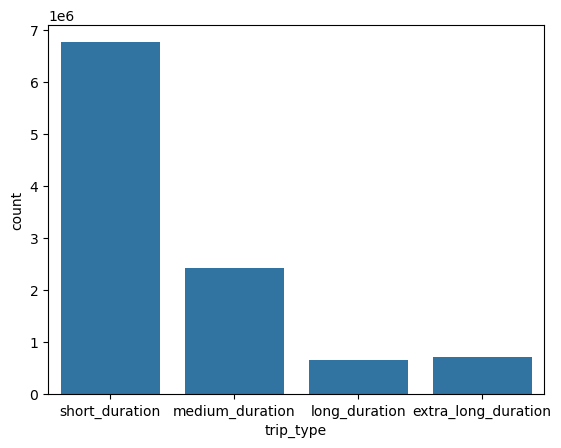

In [ ]:
sns.countplot(data=bikes3, x="trip_type")

In [ ]:
print(f"number of rows before iqr filter: {len(bikes3)}")
print(f'number of rows after iqr filter: {len(bikes_filtered)}')
print(q1)

number of rows before iqr filter: 10693415
number of rows after iqr filter: 9770553
7.0


In [ ]:
print(f"Max trip duration : {bikes_filtered["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes_filtered["trip_duration_minutes"].min()}")

Max trip duration : 39.0
Min trip duration : 0.0


ths makes sense as the max ride with day pass or unlimeted is 45minutes rides (afer you change ride)

In [ ]:
# from scipy.stats import zscore

# bikes3['z_score'] = zscore(bikes3['trip_duration_minutes'])
# # outliers = bikes3[bikes3['z_score'].abs() > 3] 
# bikes_filtered_z= bikes3[bikes3["z_score"].abs()<3]

# print(f"number of rows before z-score filter: {len(bikes3)}")
# print(f'number of rows after z-score filter: {len(bikes_filtered_z)}')
# print(f"Max trip duration : {bikes_filtered_z["trip_duration_minutes"].max()}")
# print(f"Min trip duration : {bikes_filtered_z["trip_duration_minutes"].min()}")

number of rows before z-score filter: 10693415
number of rows after z-score filter: 10665785
Max trip duration : 559.0
Min trip duration : 0.0


In [ ]:
print(bikes3["trip_duration_minutes"].quantile(0.25))
print(bikes3["trip_duration_minutes"].quantile(0.50))
print(bikes3["trip_duration_minutes"].quantile(0.75))


7.0
11.0
20.0


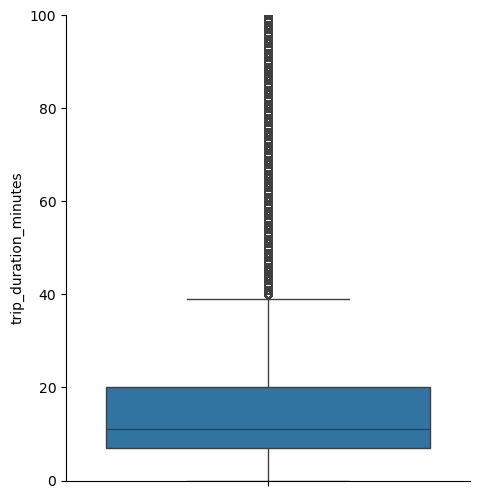

In [ ]:
# plt.boxplot(bikes3["trip_duration_minutes"])
sns.catplot(data=bikes3,kind="box", y="trip_duration_minutes").set(ylim=(0,100))

In [ ]:
#1 Create duration labels
duration_labels = ["short_duration", "medium_duration", "long_duration", "extra_long_duration"]

#2 Create the duration ranges list
duration_ranges = [0, 15, 30, 45, np.inf]

#3 Create trip_type
bikes3["trip_type"] = pd.cut(bikes3["trip_duration_minutes"],
                                  bins= duration_ranges,
                                  labels=duration_labels)

bikes3[["trip_type", "trip_duration_minutes"]]

bikes3["trip_type"].value_counts()

trip_type
short_duration         6767279
medium_duration        2425111
extra_long_duration     729120
long_duration           665323
Name: count, dtype: int64

In [ ]:
# make trip_type categorical and assign it an order
bikes3['trip_type'] = pd.Categorical(bikes3['trip_type'],
categories=['short_duration', 'medium_duration', 'long_duration', "extra_long_duration"])

on docked bikes

You can either dock or lock your ebike (not both at once). Dock at any Capital Bikeshare station for free or use the cable to lock to any public bike rack within the service area for an extra $2.

Ebike rides that are not properly ended and remain inactive for over 30 minutes will incur a $25 fee, in addition to the per minute rate.

Pedal bikes must be checked out and returned to a station. E-bikes may be docked at fixed stations or parked anywhere within the defined service area; however, users incur an additional fee when an e-bike is not parked at a station.#

#REVIEW - could it be that rideable type = ebike is not docked, there for no station assigned? 

In [ ]:
docked = bikes3[bikes3["rideable_type"]=="docked_bike"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,...,end_hour,trip_duration_minutes,time_of_day,z_score,trip_type,day,date_dow,date_is_weekend,month,year
8,9,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632,1st & M St SE,31650,casual,38.897195,...,0,12.0,night,-0.060995,short_duration,1,4,0,1,2021
18,19,docked_bike,2021-01-01 00:26:51,2021-01-01 00:47:48,Henry Bacon Dr & Lincoln Memorial Circle NW,31289,14th St & New York Ave NW,31216,casual,38.890539,...,0,21.0,night,-0.010679,medium_duration,1,4,0,1,2021
35,36,docked_bike,2021-01-01 00:47:55,2021-01-01 03:04:53,12th & L St NW,31251,7th & K St NW,31653,casual,38.903819,...,3,137.0,night,0.637844,extra_long_duration,1,4,0,1,2021
44,45,docked_bike,2021-01-01 00:59:41,2021-01-01 01:27:52,Thomas Circle,31241,Thomas Circle,31241,casual,38.905900,...,1,28.0,night,0.028456,medium_duration,1,4,0,1,2021
45,46,docked_bike,2021-01-01 00:59:44,2021-01-01 01:27:55,Thomas Circle,31241,Thomas Circle,31241,casual,38.905900,...,1,28.0,night,0.028456,medium_duration,1,4,0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9301715,9301716,docked_bike,2023-09-13 10:52:36,2023-09-13 13:16:46,19th St & Constitution Ave NW,31235,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,casual,38.892212,...,13,144.0,morning,0.676979,extra_long_duration,13,2,0,9,2023
9301718,9301719,docked_bike,2023-09-13 10:52:46,2023-09-13 13:16:24,19th St & Constitution Ave NW,31235,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,casual,38.892212,...,13,144.0,morning,0.676979,extra_long_duration,13,2,0,9,2023
9301744,9301745,docked_bike,2023-09-13 10:54:27,2023-09-13 13:16:05,19th St & Constitution Ave NW,31235,Smithsonian-National Mall / Jefferson Dr & 12t...,31248,casual,38.892212,...,13,142.0,morning,0.665797,extra_long_duration,13,2,0,9,2023
9302077,9302078,docked_bike,2023-09-13 11:27:38,2023-09-13 12:32:47,19th St & Constitution Ave NW,31235,3rd St & Pennsylvania Ave SE,31269,casual,38.892212,...,12,65.0,morning,0.235313,extra_long_duration,13,2,0,9,2023


In [ ]:
# check na station id for docked bikes 
docked["start_station_id"].isna().sum()

NameError: name 'docked' is not defined

Which hours has the highest frequency of usage?

In [ ]:
trip_duration_value_counts = bikes3["start_hour"].value_counts()
peak_time = trip_duration_value_counts.idxmax()

In [ ]:
peak_time

np.int32(17)

In [ ]:
# daily trends
# what types of trip are most popular in the different times of day?
time_of_day_type_trips = bikes3.groupby("time_of_day", observed=False)["trip_type"].value_counts()
# time_of_day_type_trips["morning"].idxmax()
unique_day_times = bikes3["time_of_day"].unique()

for time in unique_day_times:
    time_of_day_type_trips[time].idxmax()
    print(f"most popular trip duration in {time}: {time_of_day_type_trips[time].idxmax()}")

time_of_day_type_trips




most popular trip duration in night: short_duration
most popular trip duration in morning: short_duration
most popular trip duration in afternoon: short_duration
most popular trip duration in evening: short_duration


time_of_day  trip_type          
morning      short_duration         1908460
             medium_duration         590845
             extra_long_duration     157936
             long_duration           142269
afternoon    short_duration         2074869
             medium_duration         845310
             extra_long_duration     328781
             long_duration           276817
evening      short_duration         2265592
             medium_duration         823980
             long_duration           209223
             extra_long_duration     207602
night        short_duration          518358
             medium_duration         164976
             long_duration            37014
             extra_long_duration      34801
Name: count, dtype: int64

does the duration of the trip influence the rideable type ?

In [ ]:
bikes3["rideable_type"].value_counts()

rideable_type
classic_bike     7710232
electric_bike    2443713
docked_bike       539470
Name: count, dtype: int64

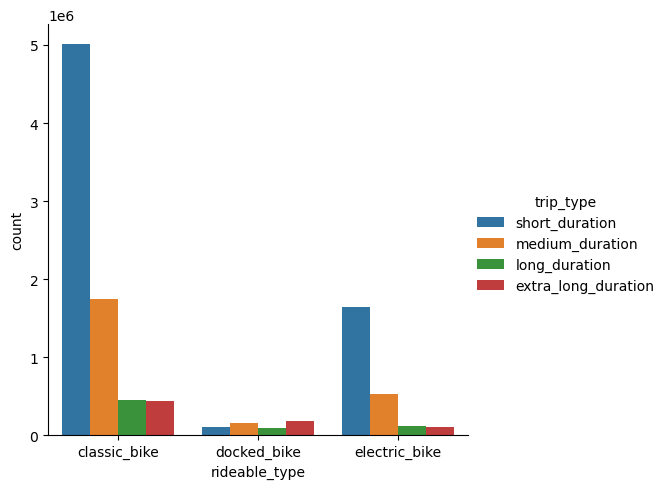

In [ ]:
sns.catplot(data=bikes3, kind="count", x = "rideable_type", hue= "trip_type")

In [ ]:
# busiest destinations
# which stations are busiest at the different times of day?

morning_time = bikes3[bikes3["time_of_day"]=="morning"]
morning_time_value_counts=morning_time["start_station_id"].value_counts()
busiest_station_morning= morning_time_value_counts.idxmax()
print(f"busiest morning station: {busiest_station_morning}")

afternoon_time = bikes3[bikes3["time_of_day"]=="afternoon"]
afternoon_time_value_counts=afternoon_time["start_station_id"].value_counts()
busiest_station_afternoon= afternoon_time_value_counts.idxmax()
print(f"busiest afternoon station: {busiest_station_afternoon}")

evening_time = bikes3[bikes3["time_of_day"]=="evening"]
evening_time_value_counts=evening_time["start_station_id"].value_counts()
busiest_station_evening= evening_time_value_counts.idxmax()
print(f"busiest evening station: {busiest_station_evening}")

night_time = bikes3[bikes3["time_of_day"]=="night"]
night_time_value_counts=night_time["start_station_id"].value_counts()
busiest_station_night= night_time_value_counts.idxmax()
print(f"busiest night station: {busiest_station_night}")

busiest morning station: 31229
busiest afternoon station: 31288
busiest evening station: 31201
busiest night station: 31201


# busiest stations

In [ ]:
top_stations = bikes3["start_station_id"].value_counts()
top50_stations_list = top_stations.head(50).index
top50_stations_list= list(top50_stations_list)


In [ ]:
# check when is each station the busiest
bikes_filter_top50_stations = bikes3[bikes3["start_station_id"].isin(top50_stations_list)]
top50_value_counts = bikes_filter_top50_stations.groupby("start_station_id")["time_of_day"].value_counts(sort=False)
top50_value_counts.head(50)
# = bikes3.groupby("start_station_id")["time_of_day"].value_counts()
#TODO - check per station which is the busiest time

for stations in top50_stations_list:
    print(f"busiest time of day at {stations} : {top50_value_counts[stations].idxmax()}")




busiest time of day at 31201 : evening
busiest time of day at 31229 : evening
busiest time of day at 31623 : evening
busiest time of day at 31258 : afternoon
busiest time of day at 31247 : afternoon
busiest time of day at 31603 : evening
busiest time of day at 31288 : afternoon
busiest time of day at 31600 : evening
busiest time of day at 31101 : morning
busiest time of day at 31119 : evening
busiest time of day at 31248 : afternoon
busiest time of day at 31613 : afternoon
busiest time of day at 31289 : afternoon
busiest time of day at 31200 : afternoon
busiest time of day at 31125 : evening
busiest time of day at 31615 : evening
busiest time of day at 31281 : evening
busiest time of day at 31202 : evening
busiest time of day at 31266 : morning
busiest time of day at 31627 : evening
busiest time of day at 31214 : evening
busiest time of day at 31203 : evening
busiest time of day at 31628 : evening
busiest time of day at 31241 : morning
busiest time of day at 31114 : evening
busiest tim

Top 5 grid cells by number of rows:
grid_cell
38915_-77039    104779
38888_-77050     97817
38909_-77035     97765
38896_-77005     90306
38888_-77033     89363
Name: count, dtype: int64


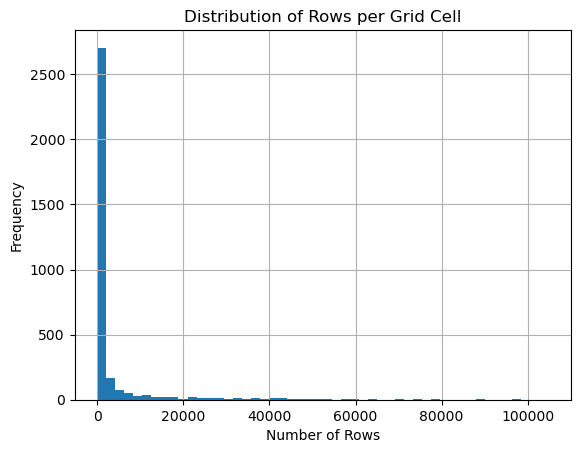

In [ ]:
grid_counts = bikes2["grid_cell"].value_counts()

print("Top 5 grid cells by number of rows:")
print(grid_counts.head())

# Histogram of grid cell sizes
grid_counts.hist(bins=50)
plt.title("Distribution of Rows per Grid Cell")
plt.xlabel("Number of Rows")
plt.ylabel("Frequency")
plt.show()

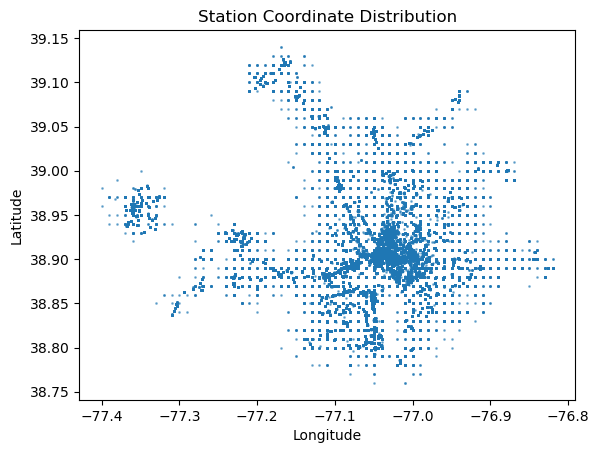

In [ ]:
plt.scatter(bikes2["start_lng"], bikes2["start_lat"], s=1, alpha=0.5)
plt.title("Station Coordinate Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

2. Strategies to Handle the Skew
Option 1: Adaptive Grid Sizes
Use smaller grid sizes in densely populated areas and larger sizes in sparse areas:

Identify Dense Areas: Determine grid cells with counts above a certain threshold.
Subdivide Dense Cells: Use a smaller grid size for those specific cells.

In [ ]:
# # Define a threshold for dense cells
# dense_threshold = grid_counts.quantile(0.95)  # Top 5% of grid cells

# # Identify dense grid cells
# dense_cells = grid_counts[grid_counts > dense_threshold].index

# # Flag rows in dense cells
# bikes2["is_dense"] = bikes2["grid_cell"].isin(dense_cells)

# # Subdivide dense cells with a smaller grid size
# dense_grid_size = chosen_grid_size / 2
# bikes2.loc[bikes2["is_dense"], "sub_grid_cell"] = (
#     (bikes2["start_lat"] // dense_grid_size).astype(int).astype(str) + "_" +
#     (bikes2["start_lng"] // dense_grid_size).astype(int).astype(str)
# )

# # Use the refined grid cell where applicable
# bikes2["final_grid_cell"] = bikes2["sub_grid_cell"].fillna(bikes2["grid_cell"])